Names:

Dauren Yedres 

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Sets/laptop_data_cleaned.csv')
df_data

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [ ]:
df_laptop=MultiColumnLabelEncoder(columns = ['Company','TypeName','Cpu_brand','Gpu_brand', 'Os']).fit_transform(df_data)
#df_laptop=inputs.loc[:, ['Gender','Smoking','Hx Radiothreapy','Hx Smoking']]
df_laptop

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,1,4,8,1.37,11.175755,0,1,226.983005,2,0,128,1,0
1,1,4,8,1.34,10.776777,0,0,127.677940,2,0,0,1,0
2,7,3,8,1.86,10.329931,0,0,141.211998,2,0,256,1,1
3,1,4,16,1.83,11.814476,0,1,220.534624,3,0,512,0,0
4,1,4,8,1.37,11.473101,0,1,226.983005,2,0,256,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,2,3,4,2.20,10.555257,0,0,100.454670,3,500,0,2,2
1269,10,0,4,1.80,10.433899,1,1,157.350512,3,0,128,1,2
1270,10,0,16,1.30,11.288115,1,1,276.053530,3,0,512,1,2
1271,10,3,2,1.50,9.409283,0,0,111.935204,4,0,0,1,2


In [ ]:
#houses_no_sqrtm=houses.loc[:, ['numberOfRooms', 'hasYard', 'hasPool', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom', 'price']]
#houses_no_sqrtm.info()

In [ ]:
X = df_laptop.loc[:, df_laptop.columns != "Price"]
Y = df_laptop["Price"]

In [ ]:
X.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'TouchScreen', 'Ips', 'Ppi',
       'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'Os'],
      dtype='object')

In [ ]:
Y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1268    10.555257
1269    10.433899
1270    11.288115
1271     9.409283
1272    10.614129
Name: Price, Length: 1273, dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
[len(x_train), len(y_train), len(x_test), len(x_test)]

[1018, 1018, 255, 255]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(n_estimators=150, max_samples=0.6, random_state=42, oob_score = True, max_features='sqrt')

In [ ]:
rfr.fit(x_train, y_train)

RandomForestRegressor(max_features='sqrt', max_samples=0.6, n_estimators=150,
                      oob_score=True, random_state=42)

In [ ]:
type(rfr.predict(x_test)) #150 arrays, and provide final array out of them
rfr.predict(x_test)

array([10.53053254, 11.27407092, 11.14582893, 11.36971948, 10.92559281,
       11.47708666,  9.70535488, 10.03644777, 10.96748806, 11.65129812,
       10.84909982, 10.94709571, 10.97012967, 10.59646936, 11.26413258,
       11.44215105, 11.37721992, 10.2031217 , 11.57998051, 11.43555273,
        9.53805373, 10.7781288 , 10.50770847, 11.36897569,  9.95345668,
       11.5740526 , 10.67272437, 11.1283899 , 11.15943614, 10.90940654,
       10.9885559 , 10.95982077, 10.24657988, 10.47229744, 11.32059713,
       10.99510637, 10.60065621, 10.97330436, 11.48157058, 10.07992299,
       10.1544295 , 11.71336757, 11.04752801, 11.25736652, 10.2269748 ,
       11.26349239, 11.41163091, 10.30659146, 11.09887252, 10.95957456,
       11.03737674, 11.4138557 , 10.86717853, 10.14825657, 10.67253678,
       10.8093545 , 11.17153195, 10.22472972, 10.88122571, 12.28237472,
       11.65089856, 11.0365753 , 11.24334829,  9.87351404, 11.30260581,
       10.54645291, 10.07823199, 10.52092022, 10.49930066, 10.73

In [ ]:
y_test

43      10.500591
1160    11.288115
128     11.216927
1232    11.352069
1193    11.064804
          ...    
96      10.372324
184     11.064804
788     11.715791
970     11.524644
163     10.959351
Name: Price, Length: 255, dtype: float64

In [ ]:
rfr.score(x_test,y_test)

0.8870022270198885

In [ ]:
rfr.oob_score_

0.8820685052363982

In [ ]:
1-rfr.oob_score_

0.11793149476360176

In [ ]:
r2_score(y_train, rfr.predict(x_train))

0.962808879211769

In [ ]:
y_rfr_pred=rfr.predict(x_test)

In [ ]:
r2_score(y_test, y_rfr_pred)

0.8870022270198885

In [ ]:
y_test.max(), y_test.min()

(12.69144113, 9.268865851)

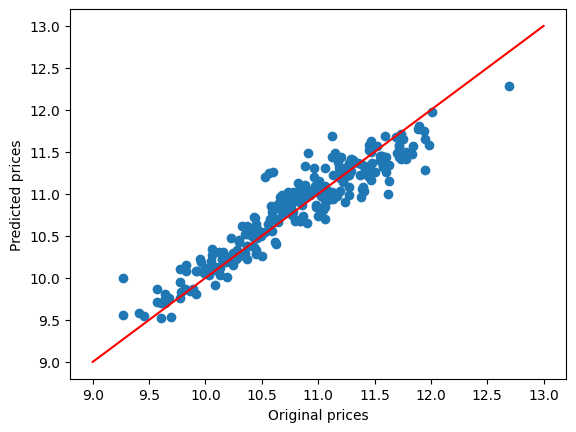

In [ ]:
plt.scatter(y_test, y_rfr_pred)
plt.plot([9, 10, 12, 13], [9, 10, 12, 13], c='red')
plt.xlabel('Original prices')
plt.ylabel('Predicted prices')
plt.show()

In [ ]:
importances = rfr.feature_importances_
importances

array([0.03677996, 0.06663843, 0.25575526, 0.10537435, 0.00695766,
       0.01284815, 0.14289669, 0.13919826, 0.01612197, 0.16520997,
       0.03236312, 0.01985617])

In [ ]:
import numpy as np
indices2 = np.argsort(importances)
indices2

array([ 4,  5,  8, 11, 10,  0,  1,  3,  7,  6,  9,  2])

In [ ]:
indices = np.argsort(importances)[::-1]
indices

array([ 2,  9,  6,  7,  3,  1,  0, 10, 11,  8,  5,  4])

In [ ]:
importances[indices]

array([0.25575526, 0.16520997, 0.14289669, 0.13919826, 0.10537435,
       0.06663843, 0.03677996, 0.03236312, 0.01985617, 0.01612197,
       0.01284815, 0.00695766])

In [ ]:
features = X.columns
features[indices]

Index(['Ram', 'SSD', 'Ppi', 'Cpu_brand', 'Weight', 'TypeName', 'Company',
       'Gpu_brand', 'Os', 'HDD', 'Ips', 'TouchScreen'],
      dtype='object')

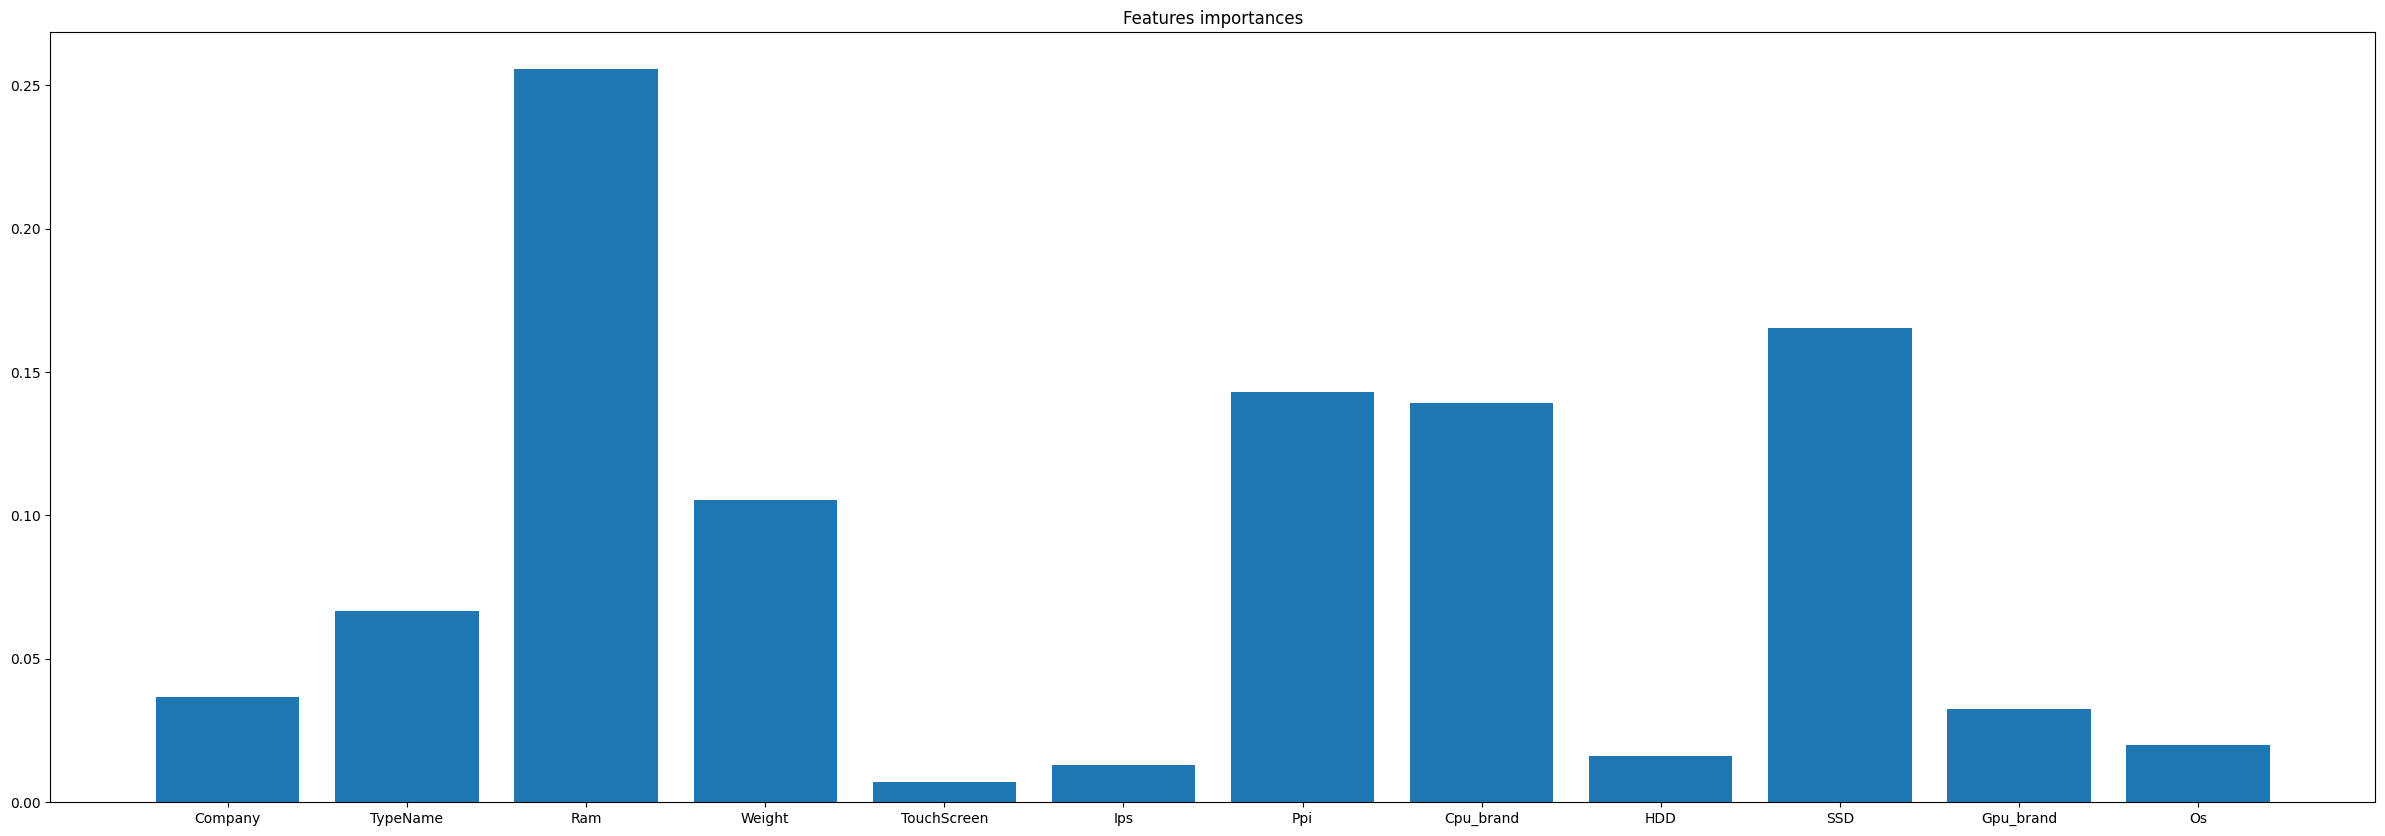

In [ ]:
plt.figure(figsize=(30,10))
plt.bar(features, importances)
plt.title("Features importances")
plt.show()

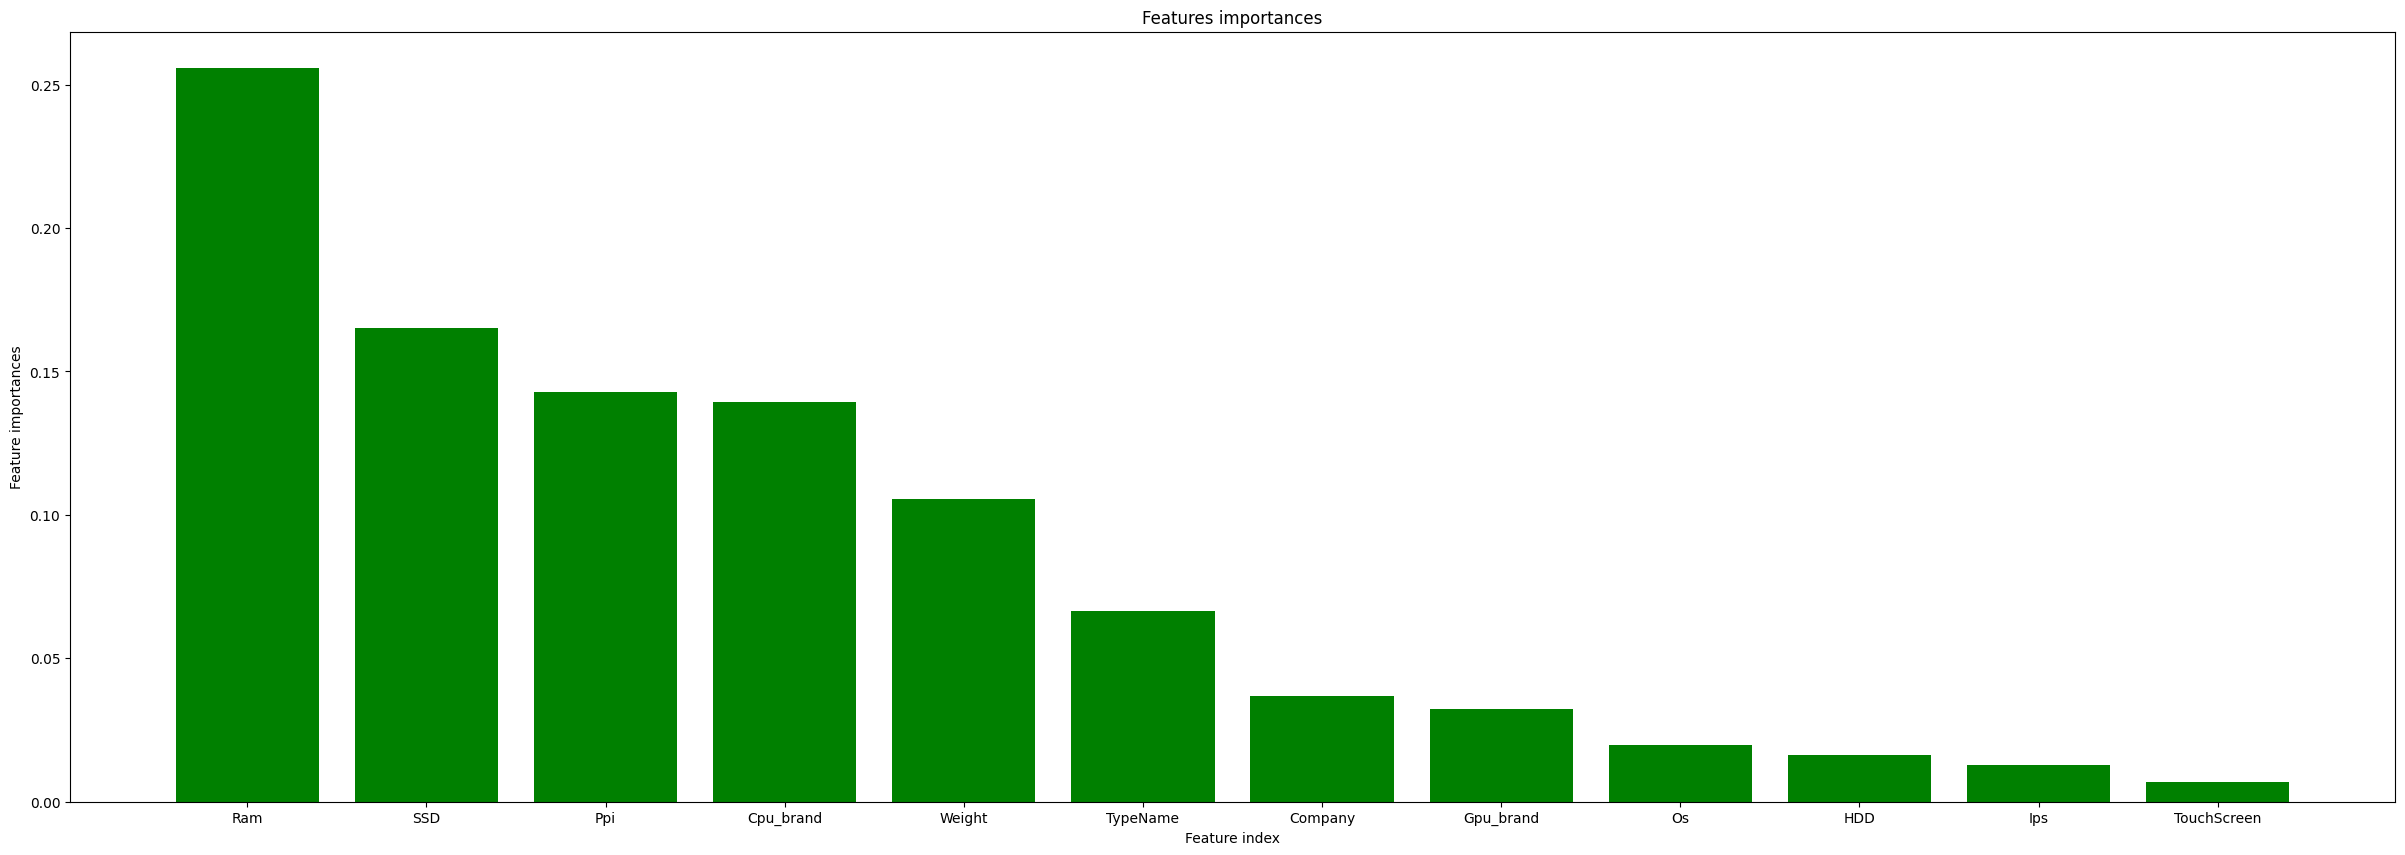

In [ ]:
plt.figure(figsize=(30,10))
plt.bar(features[indices], importances[indices], color='green')
plt.title("Features importances")
plt.xlabel("Feature index")
plt.ylabel("Feature importances")
plt.show()

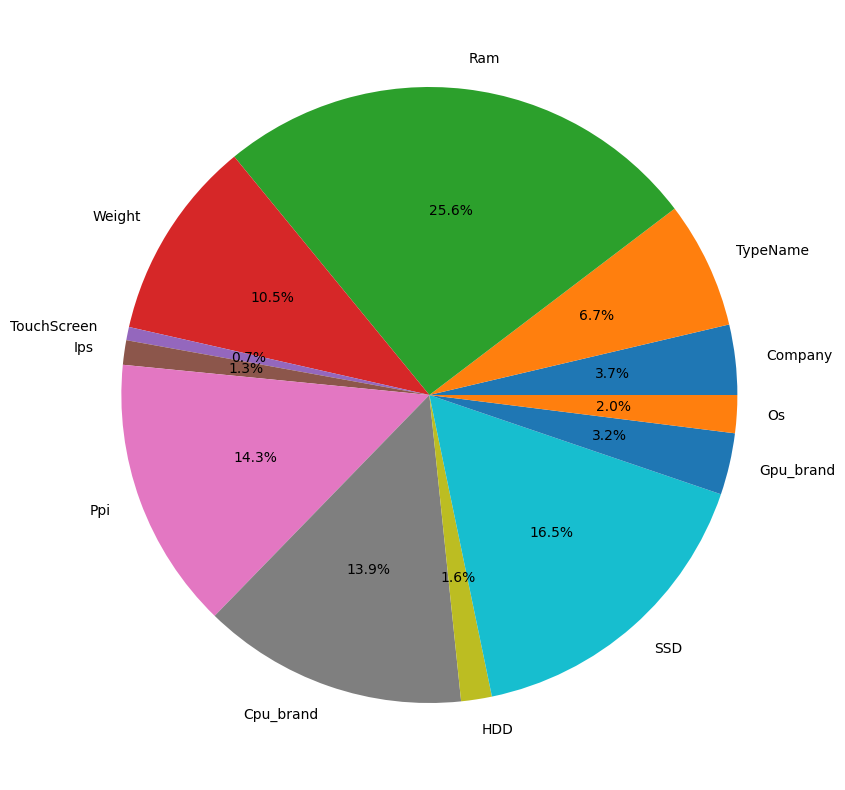

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(importances, labels = features, autopct='%0.1f%%')#0.2 is decimal, if we put 0.1 we will have one decimal
plt.show()

In [ ]:
features

Index(['Company', 'TypeName', 'Ram', 'Weight', 'TouchScreen', 'Ips', 'Ppi',
       'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'Os'],
      dtype='object')